In [2]:
import numpy as np
import pandas as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.datasets import load_diabetes ,make_regression



cross_val sklearn implementaion 

- estimator: The machine learning model or estimator object that you want to evaluate. It should have a fit method to train the model and a score method or a specified scoring metric for evaluation.

- X: The input features or data matrix.

- y: The target variable or output labels. It is optional and can be omitted for unsupervised learning tasks.

- scoring: The evaluation metric to use. It can be a predefined string metric (e.g., "accuracy", "f1", "mean_squared_error") or a custom scoring function. If scoring is not specified, the estimator's default score method is used.

- cv: The cross-validation strategy or the number of folds to use. It can be an integer (e.g., 5 for 5-fold cross-validation) or an object that implements a specific cross-validation scheme (e.g., KFold, StratifiedKFold). If cv is None, it uses the default 5-fold cross-validation.

- n_jobs: The number of parallel jobs to run during cross-validation. It allows for faster computation by parallelizing the process. Setting n_jobs to -1 uses all available processors.

# problem with hold out approch 

In [16]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

random_states=[10,20,30,42,38,108]

for i in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i) 
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    # Evaluate the model
    print("random state is {}".format(i))
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
    r2=r2_score(y_test, y_pred)
    print('R2 score ->',r2 ,'\n')







random state is 10
Mean Squared Error: 2911.8118861191774
R2 score -> 0.5341988244945842 

random state is 20
Mean Squared Error: 3461.6627862550476
R2 score -> 0.4179775463198647 

random state is 30
Mean Squared Error: 3287.479348826673
R2 score -> 0.4653044632644133 

random state is 42
Mean Squared Error: 2900.19362849348
R2 score -> 0.4526027629719197 

random state is 38
Mean Squared Error: 3242.190913590777
R2 score -> 0.25754992209749294 

random state is 108
Mean Squared Error: 2443.813726634741
R2 score -> 0.5951326918629855 



</b> we can clearly see the variablity in r2 score when the randomstate is changing .

# Leave-one-out cross-validation 

In [106]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

# Create Leave-One-Out Cross-Validator
cv = LeaveOneOut()

# Initialize an empty list to store the evaluation results
Scores= cross_val_score(model,X,y,cv=cv,scoring='neg_mean_squared_error')

In [120]:
abs(Scores.mean())

3001.7528469994304

In [122]:
sqrt(3001)

NameError: name 'sqrt' is not defined

#### Leave-one-out cross-validation offers the following pros:

1. It provides a much less biased measure of test MSE compared to using a single test set because we repeatedly fit a model to a dataset that contains n-1 observations.
2. It tends not to overestimate the test MSE compared to using a single test set.

However, leave-one-out cross-validation comes with the following cons:

1. It can be a time-consuming process to use when n is large.
2. It can also be time-consuming if a model is particularly complex and takes a long time to fit to a dataset.
3. It can be computationally expensive.

K_fold

In [15]:

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# model
model = LinearRegression()
Scores= cross_val_score(model,X,y,cv=5,scoring='r2')

for fold, score in enumerate(Scores, start=1):
    print(f"Fold {fold}: {score}")

#Avg score 
avg_score = Scores.mean()
print("Average Score - ", avg_score)

NameError: name 'X' is not defined

experminting with different k_fold and try to find the variablity of accuracy when incresing the kfold.

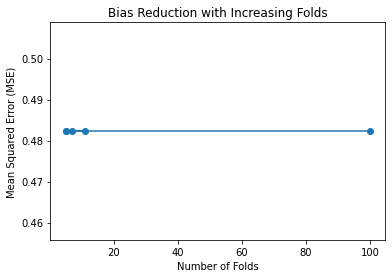

Fold 5: 0.48231643590864215
Fold 11: 0.48231643590864215
Fold 5: 0.48231643590864215
Fold 7: 0.48231643590864215
Fold 100: 0.48231643590864215


In [77]:
n_folds = [5,11,5,7,100]
avg_scores = []
scores_=[]


X, y = make_regression(n_samples=10000, n_features=3, noise=20, random_state=42)
# Perform cross-validation for each number of folds
for i in n_folds:
    kfold = KFold(n_splits=i, shuffle=True, random_state=i)
    model = LinearRegression()
    scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    scores_.append(scores)
    avg_score = Scores.mean()
    avg_scores.append(avg_score)

plt.plot(n_folds, avg_scores, marker='o')
plt.xlabel('Number of Folds')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Bias Reduction with Increasing Folds')
plt.show()

for fold, score in zip(n_folds,avg_scores):
    print(f"Fold {fold}: {score}")

at every fold result is same but increasing the k_fold may lead the following prblem.

- Smaller Validation Sets: As the number of folds increases, each validation set becomes smaller. With a larger k, a larger portion of the data is used for validation in each iteration, resulting in less data available for training the model. Smaller validation sets can provide a more precise estimate of model performance on unseen data but may also lead to higher variability in the evaluation scores.

- Increased Computational Cost: Increasing the value of k also increases the computational cost of k-fold cross-validation. With each fold, the model needs to be trained and evaluated, resulting in more iterations. This can be time-consuming and resource-intensive, especially for large datasets or complex models. Therefore, higher values of k may lead to longer execution times.

- Higher Variability in Performance: With more folds, the cross-validation estimate of model performance becomes more precise but can also increase the variability in performance scores across the folds. Each fold represents a different validation set, and the model's performance can vary depending on the specific subset used for validation. With a higher number of folds, the model's performance may exhibit more variance due to the increased number of validation sets.

- Reduced Bias in Performance Estimate: Increasing the number of folds can reduce the bias in the performance estimate of the model. By using more subsets as validation sets, the estimate becomes less dependent on the specific train-test split and is less biased towards any particular portion of the data. This can provide a more accurate representation of the model's performance on unseen data.

`Advantage and disadvantage of KFolod `

#### Advantages of k-fold cross-validation:

1. Better performance estimation: k-fold cross-validation provides a more robust estimate of a model's performance compared to a single train-test split. It reduces the impact of variability in the data by averaging the results across multiple folds.

2. Efficient use of data: k-fold cross-validation allows you to make the most out of your available data. By using all data points for both training and testing in different folds, you maximize the utilization of the dataset.

3. Model selection and hyperparameter tuning: k-fold cross-validation is commonly used for model selection and hyperparameter tuning. It enables fair and unbiased comparison of different models or hyperparameter configurations by using the same folds for evaluation.

#### Disadvantages and limitations of k-fold cross-validation:

1. Computational cost: The computational cost of k-fold cross-validation can be higher compared to a single train-test split. As the number of folds (k) increases, the training and evaluation process needs to be repeated k times, which can be time-consuming for large datasets or complex models.

2. Potential bias in small datasets: In small datasets, k-fold cross-validation might introduce bias due to the limited number of samples available for training and testing. The performance estimates may not be representative of the model's true generalization performance.

3. Data leakage in feature engineering: If feature engineering techniques are applied based on the entire dataset before cross-validation, there is a risk of data leakage. Information from the testing folds could unintentionally influence the feature engineering process and lead to overly optimistic performance estimates.

4. Difficulty in handling class imbalance: k-fold cross-validation alone does not handle class imbalance issues in the dataset. If the dataset has imbalanced classes, the performance evaluation may still be biased towards the majority class unless additional techniques like stratified sampling or stratified cross-validation are used.

  +-------------------------------+
  |          Data Samples        |
  +-------------------------------+
                |
                v
  +-------------------------------+
  |        Stratified Split       |
  |       (k=5 in this example)   |
  +-------------------------------+
                |
                v
  +-------------------------------+
  |          Fold 1               |
  |        Train: Folds 2-5       |
  |        Test: Fold 1           |
  +-------------------------------+
                |
                v
  +-------------------------------+
  |          Fold 2               |
  |        Train: Folds 1, 3-5    |
  |        Test: Fold 2           |
  +-------------------------------+
                |
                v
  +-------------------------------+
  |          Fold 3               |
  |        Train: Folds 1-2, 4-5  |
  |        Test: Fold 3           |
  +-------------------------------+
                |
                v
  +-------------------------------+
  |          Fold 4               |
  |        Train: Folds 1-3, 5    |
  |        Test: Fold 4           |
  +-------------------------------+
                |
                v
  +-------------------------------+
  |          Fold 5               |
  |        Train: Folds 1-4       |
  |        Test: Fold 5           |
  +-------------------------------+
                |
                v
  +-------------------------------+
  |    Performance Aggregation    |
  +-------------------------------+
                |
                v
  +-------------------------------+
  |      Overall Performance      |
  +-------------------------------+


In [9]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Generate a large dummy dataset with imbalanced output
# Set random seed for reproducibility
np.random.seed(33)

# Number of samples
n_samples = 10000

# Generate features (dummy data)
X = np.random.rand(n_samples, 5)

# Generate imbalanced output
y = np.concatenate([np.zeros(9000), np.ones(1000)])

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=22,test_size=0.2)

# Number of folds
k = 5  
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
model = LogisticRegression()

cross_val=cross_val_score(model,X_train,y_train,cv=skf,scoring='accuracy')

In [10]:
cross_val

array([0.89875 , 0.89875 , 0.89875 , 0.89875 , 0.898125])

In [11]:
np.mean(cross_val)

0.898625

In [12]:
model.fit(X_train,y_train)

LogisticRegression()

In [13]:
y_pred=model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred)

0.9055